<a href="https://colab.research.google.com/github/VivianAI-Med/My-Portifolio/blob/main/Exam_scores_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path="/content/my data para.xlsx"
trial = pd.read_excel(file_path)
trial.head()

,Student Number,Progressive,Summative,Total
0,2200706472,30.4,49.8,80.2
1,2200706841,30.4,49.8,80.2
2,2100700952,32.0,48.0,80.0
3,2100701670,29.6,50.4,80.0
4,2100700004,29.6,49.8,79.4


Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Progressive' is the independent variable (X) and 'Summative' is the dependent variable (y)
X = trial[['Progressive']] # Use double brackets to keep it as a DataFrame (required by scikit-learn)
y = trial['Summative']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_
w = model.coef_[0]
b = model.intercept_

print(f"Linear Regression Model:")
print(f"Summative = {slope:.2f} * Progressive + {intercept:.2f}")

# You can also make predictions
# example_progressive_score = 30
# predicted_summative_score = model.predict([[example_progressive_score]])
# print(f"Predicted Summative score for Progressive score of {example_progressive_score}: {predicted_summative_score[0]:.2f}")


Linear Regression Model:
Summative = -0.50 * Progressive + 63.26


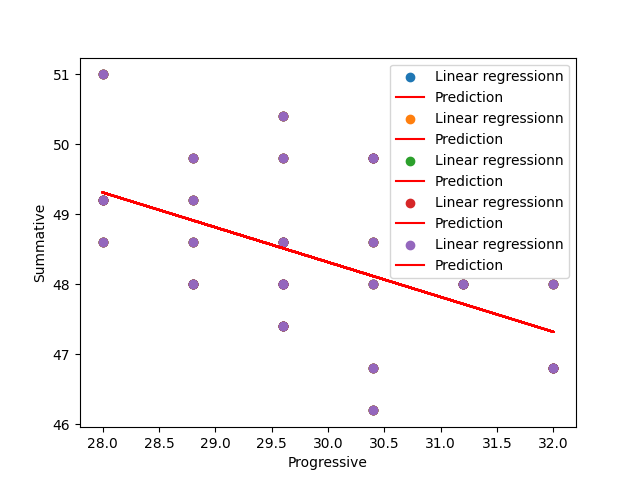

In [8]:
plt.scatter(X, y, label='Linear regressionn')
plt.plot(X, model.predict(X), color='red', label='Prediction')
plt.xlabel('Progressive')
plt.ylabel('Summative')
plt.legend()
plt.show()


In [7]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

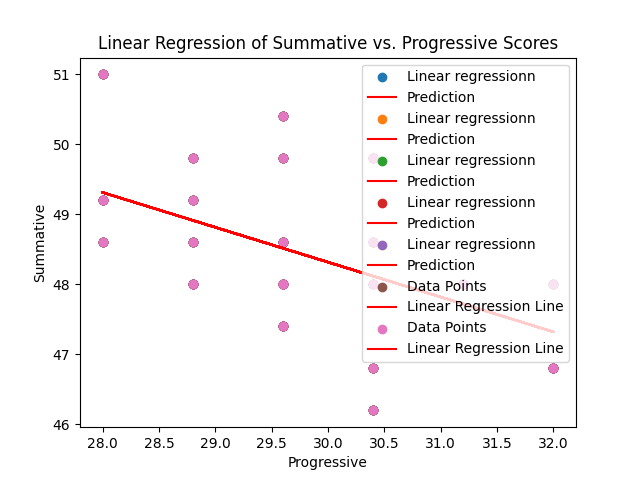

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined from the linear regression step
# X is the independent variable (Progressive)
# y is the dependent variable (Summative)
# model is the trained LinearRegression model

plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')
plt.xlabel('Progressive')
plt.ylabel('Summative')
plt.title('Linear Regression of Summative vs. Progressive Scores')
plt.legend()
plt.show()

In [11]:
# Predictions for plotting
f_wb = w*X.values.flatten() + b

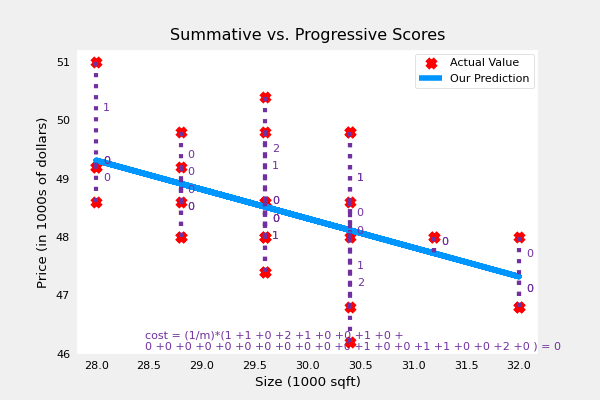

In [12]:
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, mk_cost_lines

fig, ax = plt.subplots(1, 1, figsize=(6,4))

# Plot actual vs prediction
plt_house_x(X.values.flatten(), y, f_wb=f_wb, ax=ax)

# Add cost lines for illustration
mk_cost_lines(X.values.flatten(), y, w, b, ax)
plt.title('Summative vs. Progressive Scores')
plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(x, y, w, b):
    """
    Compute mean squared error cost for linear regression.
    """
    m = x.shape[0]
    predictions = w * x + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def plt_contour_wgrad(x, y, w_range=(-100, 100), b_range=(-100, 100), resolution=50, fitted_point=None):
    """
    Draws a contour plot of the cost function J(w, b).

    Parameters
    ----------
    x : ndarray
        Input feature values
    y : ndarray
        Target values
    w_range : tuple
        Min and max range for slope (w)
    b_range : tuple
        Min and max range for intercept (b)
    resolution : int
        Grid resolution for contouring
    fitted_point : tuple
        (w, b) to highlight on the contour
    """
    # Create grid of w and b
    w_vals = np.linspace(w_range[0], w_range[1], resolution)
    b_vals = np.linspace(b_range[0], b_range[1], resolution)

    # Initialize cost array
    J_vals = np.zeros((len(w_vals), len(b_vals)))

    # Compute cost for each (w, b)
    for i, w in enumerate(w_vals):
        for j, b in enumerate(b_vals):
            J_vals[i, j] = compute_cost(x, y, w, b)

    # Transpose J_vals so contour aligns correctly
    J_vals = J_vals.T

    # Plot contours
    fig, ax = plt.subplots(figsize=(6, 4))
    CS = ax.contour(w_vals, b_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
    ax.clabel(CS, inline=True, fontsize=8)
    ax.set_xlabel("w (slope)")
    ax.set_ylabel("b (intercept)")
    ax.set_title("Cost Function Contour Plot")

    # Mark fitted point if provided
    if fitted_point is not None:
        ax.scatter(fitted_point[0], fitted_point[1], marker='x', c='r', s=100, label="Fitted (w,b)")
        ax.legend()

    plt.show()

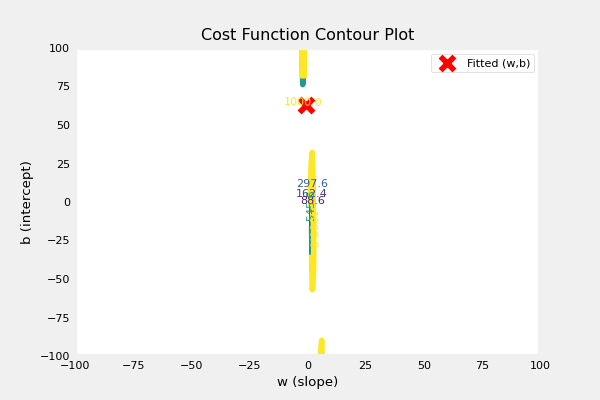

In [15]:
# plot contour, using your dataset
def plt_contour_wgrad_auto(x, y, w, b, zoom_w=2, zoom_b=20, resolution=100):
    w_range = (w - zoom_w, w + zoom_w)
    b_range = (b - zoom_b, b + zoom_b)
    plt_contour_wgrad(x, y, w_range=w_range, b_range=b_range,
                      resolution=resolution, fitted_point=(w, b))
plt_contour_wgrad(X.values.flatten(), y, fitted_point=(w, b))
def plt_contour_wgrad_auto(x, y, w, b, zoom_w=2, zoom_b=20, resolution=100):
    w_range = (w - zoom_w, w + zoom_w)
    b_range = (b - zoom_b, b + zoom_b)
    plt_contour_wgrad(x, y, w_range=w_range, b_range=b_range,
                      resolution=resolution, fitted_point=(w, b))